# Simulation Project

## Libraries

In [64]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(100)

## Variables

In [65]:
simulation_time = 660
FEL = []

current_time = 0
customers_1 = 0
customers_2 = 0

start_time = []
finish_time = []
delay_time = []

queue_history = []
time_history = []

David_customer = 0
Betty_customer = 0

waiting_customer = 0

LB = 0
LD = -1

LQ = 0
LQ_type = []

## Starting condition

In [66]:
# arrival of first customer
random_num = np.random.random()
if random_num < 0.5:
    FEL.append((0,'a1'))
    FEL.append((1,'a2'))
else:
    FEL.append((0,'a2'))
    FEL.append((1,'a1'))

queue_history.append(0)
time_history.append(0)

# starting cleaning saw
FEL.append((0,'sd'))

## Arrival function type one(Saw renter)

In [67]:
def arrival_type_1():
    global FEL, current_time, customers_1, customers_2, start_time, finish_time, LB, LD, LQ, LQ_type, waiting_customer, Betty_customer
    customers_1 += 1
    between_arrival_time_1 = np.random.uniform(0,60)
    if (current_time + between_arrival_time_1) < 600:
        FEL.append((current_time + between_arrival_time_1, 'a1'))
        FEL.sort()
    if LB == 0:
        LB = 1
        Betty_customer += 1
        renting_time_Betty = np.random.uniform(5,15)
        FEL.append((current_time + renting_time_Betty, 'rb1'))
        FEL.sort()
    elif LB == 1:
        LQ += 1
        waiting_customer += 1
        queue_history.append(LQ)
        time_history.append(current_time)
        LQ_type.append('a1')
        start_time.append(current_time)
        

## Arrival function type two (Saw restorer)

In [68]:
def arrival_type_2():
    global FEL, current_time,customers_1, customers_2, start_time, finish_time, LB, LD, LQ, LQ_type, waiting_customer, Betty_customer 
    customers_2 += 1
    between_arrival_time_2 = np.random.uniform(0,60)
    if (current_time + between_arrival_time_2) < 600:
        FEL.append((current_time + between_arrival_time_2, 'a2'))
        FEL.sort()
    if LB == 0:
        LB = 1
        Betty_customer += 1
        FEL.append((current_time + 2, 'rb2'))
        FEL.sort()
    elif LB == 1:
        LQ += 1
        waiting_customer += 1
        queue_history.append(LQ)
        time_history.append(current_time)
        LQ_type.append('a2')

## Completion of type 1 service by Betty

In [69]:
def comp_rent_Betty():
    global FEL, current_time, customers_1,customers_2, start_time, finish_time, LB, LD, LQ, LQ_type, Betty_customer
    if current_time<600:
        if LQ > 0:
            LQ -= 1
            Betty_customer += 1
            queue_history.append(LQ)
            time_history.append(current_time)
            CT = LQ_type.pop(0)
            if CT == 'a1':
                finish_time.append(current_time)
                renting_time_Betty = np.random.uniform(5,15)
                FEL.append((current_time + renting_time_Betty, 'rb1'))
                FEL.sort()
            elif CT == 'a2':
                FEL.append((current_time + 2, 'rb2'))
                FEL.sort()
        elif LQ == 0:
            LB = 0 
    elif (current_time >= 600 and current_time < 660):
        if LQ > 0:
            LQ -= 1
            Betty_customer += 1
            queue_history.append(LQ)
            time_history.append(current_time)
            CT = LQ_type.pop(0)
            if CT == 'a1':
                finish_time.append(current_time)
                renting_time_Betty = np.random.uniform(5,15)
                FEL.append((current_time + renting_time_Betty, 'rb1'))
                FEL.sort()
            elif CT == 'a2':
                FEL.append((current_time + 2, 'rb2'))
                FEL.sort()
        elif LQ == 0:
            LB = -1
            maintenance_time_Betty = np.random.uniform(2,10)
            clean_time_Betty = np.random.uniform(4,16)
            FEL.append((current_time+maintenance_time_Betty+clean_time_Betty,'sb'))
            FEL.sort()

## Completion of type 2 service by Betty

In [70]:
def comp_restore_Betty():
    global FEL, current_time, customers_1,customers_2, start_time, finish_time, LB, LD, LQ, LQ_type, Betty_customer
    if current_time<600:
        if LQ > 0:
            LQ -= 1
            Betty_customer += 1
            queue_history.append(LQ)
            time_history.append(current_time)
            CT = LQ_type.pop(0)
            if CT == 'a1':
                finish_time.append(current_time)
                renting_time_Betty = np.random.uniform(5,15)
                FEL.append((current_time + renting_time_Betty, 'rb1'))
                FEL.sort()
            elif CT == 'a2':
                FEL.append((current_time + 2, 'rb2'))
                FEL.sort()
        elif LQ == 0:
            LB = 0 
    elif (current_time >= 600 and current_time < 660):
        if LQ > 0:
            LQ -= 1
            Betty_customer += 1
            queue_history.append(LQ)
            time_history.append(current_time)
            CT = LQ_type.pop(0)
            if CT == 'a1':
                finish_time.append(current_time)
                renting_time_Betty = np.random.uniform(5,15)
                FEL.append((current_time + renting_time_Betty, 'rb1'))
                FEL.sort()
            elif CT == 'a2':
                FEL.append((current_time + 2, 'rb2'))
                FEL.sort()
        elif LQ == 0:
            LB = -1
            maintenance_time_Betty = np.random.uniform(2,10)
            clean_time_Betty = np.random.uniform(4,16)
            FEL.append((current_time+maintenance_time_Betty+clean_time_Betty,'sb'))
            FEL.sort()

## Completion of cleaning saw by Betty

In [71]:
def cleaning_Betty():
    global FEL, current_time, customers, start_time, finish_time, LB, LD, LQ, LQ_type
    maintenance_time_Betty = np.random.uniform(2,10)
    clean_time_Betty = np.random.uniform(4,16)
    FEL.append((current_time+maintenance_time_Betty+clean_time_Betty,'sb'))
    FEL.sort()

## Completion of type 1 service by David

In [72]:
def comp_rent_David():
    global FEL, current_time, customers, start_time, finish_time, LB, LD, LQ, LQ_type, David_customer
    if LQ > 0:
        LD = 1
        LQ -= 1
        David_customer += 1
        queue_history.append(LQ)
        time_history.append(current_time)
        CT = LQ_type.pop(0)
        if CT == 'a1':
            finish_time.append(current_time)
            renting_time_David = np.random.uniform(10,18)
            FEL.append((current_time + renting_time_David, 'rd1'))
            FEL.sort()
        elif CT == 'a2':
            FEL.append((current_time + 2, 'rd2'))
            FEL.sort()
    elif LQ == 0:
        LD = -1
        maintenance_time_David = np.random.uniform(2,10)
        clean_time_David = np.random.uniform(4,16)
        FEL.append((current_time+maintenance_time_David+clean_time_David,'sd'))
        FEL.sort()
        

## Completion of type 2 service by David

In [73]:
def comp_restore_David():
    global FEL, current_time, customers, start_time, finish_time, LB, LD, LQ, LQ_type, David_customer
    if LQ > 0:
        LD = 1
        LQ -= 1
        David_customer += 1
        queue_history.append(LQ)
        time_history.append(current_time)
        CT = LQ_type.pop(0)
        if CT == 'a1':
            finish_time.append(current_time)
            renting_time_David = np.random.uniform(10,18)
            FEL.append((current_time + renting_time_David, 'rd1'))
            FEL.sort()
        elif CT == 'a2':
            FEL.append((current_time + 2, 'rd2'))
            FEL.sort()
    elif LQ == 0:
        LD = -1
        maintenance_time_David = np.random.uniform(2,10)
        clean_time_David = np.random.uniform(4,16)
        FEL.append((current_time+maintenance_time_David+clean_time_David,'sd'))
        FEL.sort()
        

## Completion of cleaning saw by David

In [74]:
def cleaning_David():
    global FEL, current_time, customers, start_time, finish_time, LB, LD, LQ, LQ_type, David_customer
    if LQ > 0:
        LD = 1
        LQ -= 1
        David_customer += 1
        queue_history.append(LQ)
        time_history.append(current_time)
        CT = LQ_type.pop(0)
        if CT == 'a1':
            finish_time.append(current_time)
            renting_time_David = np.random.uniform(10,18)
            FEL.append((current_time + renting_time_David, 'rd1'))
            FEL.sort()
        elif CT == 'a2':
            FEL.append((current_time + 2, 'rd2'))
            FEL.sort()
    elif LQ == 0:
        LD = -1
        maintenance_time_David = np.random.uniform(2,10)
        clean_time_David = np.random.uniform(4,16)
        FEL.append((current_time+maintenance_time_David+clean_time_David,'sd'))
        FEL.sort()
        

## Heart of Simulation

In [75]:
while (current_time < simulation_time):
    current_time,event_type = FEL.pop(0)
    if event_type=='a1':    
        arrival_type_1()
    elif event_type=='a2':
        arrival_type_2()
    elif event_type=='rb1':
        comp_rent_Betty()
    elif event_type=='rb2':
        comp_restore_Betty()
    elif event_type=='sb':
        cleaning_Betty()
    elif event_type=='rd1':
        comp_rent_David() 
    elif event_type=='rd2':
        comp_rent_David()
    elif event_type=='sd':
        cleaning_David()

In [76]:
length_time = len(finish_time)
for i in range(length_time):
    delay = finish_time[i] - start_time[i]
    delay_time.append(delay)
print(delay_time)
print("Count of saw rental customers is:",customers_1)
print("Count of saw restorer customers is:",customers_2)

[1, 12.424359475809432, 10.956175695386701, 0.20369323835903685, 7.249297556145422, 2.3096619084882377]
Count of saw rental customers is: 21
Count of saw restorer customers is: 19


## The average delay period of saw rental customers

In [77]:
sum_delay_time = np.sum(delay_time)
avg_delay_time = sum_delay_time / customers_1
print("The average delay period of saw rental customers is:",avg_delay_time)

The average delay period of saw rental customers is: 1.6258660892470869


## Queue in the period of time

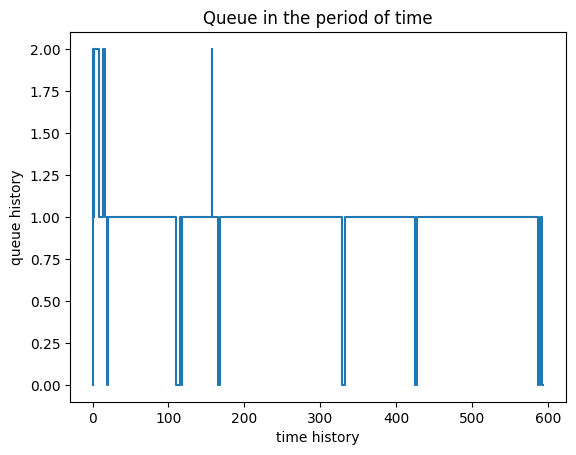

In [78]:
plt.step(time_history, queue_history)
plt.title('Queue in the period of time')
plt.xlabel('time history')
plt.ylabel("queue history")
plt.show()

## average of LQ

In [79]:
length_LQ = len(time_history)
sum_LQ = 0
for i in range (length_LQ-1):
    sum_LQ += (time_history[i+1]-time_history[i])*queue_history[i]
average_LQ = sum_LQ / 600
print("average of LQ is:",average_LQ)

average of LQ is: 0.10294871292317903


In [80]:
#queue_history

In [81]:
#time_history

In [82]:
print("count of customer type 1:",customers_1)
print("count of customer type 2:",customers_2)

count of customer type 1: 21
count of customer type 2: 19


In [83]:
p_waiting = waiting_customer / (customers_1 + customers_2)
print("Probability of waiting customer:",p_waiting)
print("Probability of being serviced on time:",1-p_waiting)

Probability of waiting customer: 0.3
Probability of being serviced on time: 0.7


In [84]:
print("Number of customers of Betty:", Betty_customer)
print("Number of customers of David:", David_customer)
Betty_customer + David_customer == customers_1 + customers_2

Number of customers of Betty: 37
Number of customers of David: 3


True